In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/leetcode-questions-dataset/Leetcode_Questions.csv


In [2]:
# Load the data
data = pd.read_csv("/kaggle/input/leetcode-questions-dataset/Leetcode_Questions.csv")
data.head()

,Question_No,Question,Acceptance,isPremium,Difficulty,Question_Link,Solution
0,1,Two Sum,53.80%,False,Easy,https://leetcode.com/problems/two-sum/description,https://leetcode.com/problems/two-sum/solutions
1,2,Add Two Numbers,44.10%,False,Medium,https://leetcode.com/problems/add-two-numbers/...,https://leetcode.com/problems/add-two-numbers/...
2,3,Longest Substring Without Repeating Characters,35.40%,False,Medium,https://leetcode.com/problems/longest-substrin...,https://leetcode.com/problems/longest-substrin...
3,4,Median of Two Sorted Arrays,41.50%,False,Hard,https://leetcode.com/problems/median-of-two-so...,https://leetcode.com/problems/median-of-two-so...
4,5,Longest Palindromic Substring,34.40%,False,Medium,https://leetcode.com/problems/longest-palindro...,https://leetcode.com/problems/longest-palindro...


# Fields and Data Types 📊:
The dataset includes the following attributes:

- **Question_No**: The unique question number on Leetcode.
- **Question**: The title of the question.
- **Acceptance**: The acceptance rate of each question (as a percentage).
- **isPremium**: Boolean indicating whether the question requires a premium subscription (True or False).
- **Difficulty**: The difficulty level of the question (e.g., Easy, Medium, Hard).
- **Question_Link**: The URL to the question on LeetCode.
- **Solution**: The URL to the solutions provided for the question. 

In [3]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Question_No    2913 non-null   int64 
 1   Question       2913 non-null   object
 2   Acceptance     2913 non-null   object
 3   isPremium      2913 non-null   bool  
 4   Difficulty     2913 non-null   object
 5   Question_Link  2913 non-null   object
 6   Solution       2913 non-null   object
dtypes: bool(1), int64(1), object(5)
memory usage: 139.5+ KB
None


In [4]:
# Descriptive statistics
data.describe()

,Question_No
count,2913.000000
mean,1612.115002
std,944.482382
min,1.000000
25%,805.000000
50%,1588.000000
75%,2431.000000
max,3250.000000


# Handling missing data

In [5]:
# Verify the data
print(data.isnull().sum())

Question_No      0
Question         0
Acceptance       0
isPremium        0
Difficulty       0
Question_Link    0
Solution         0
dtype: int64


# EDA (Exploratory Data Analysis)

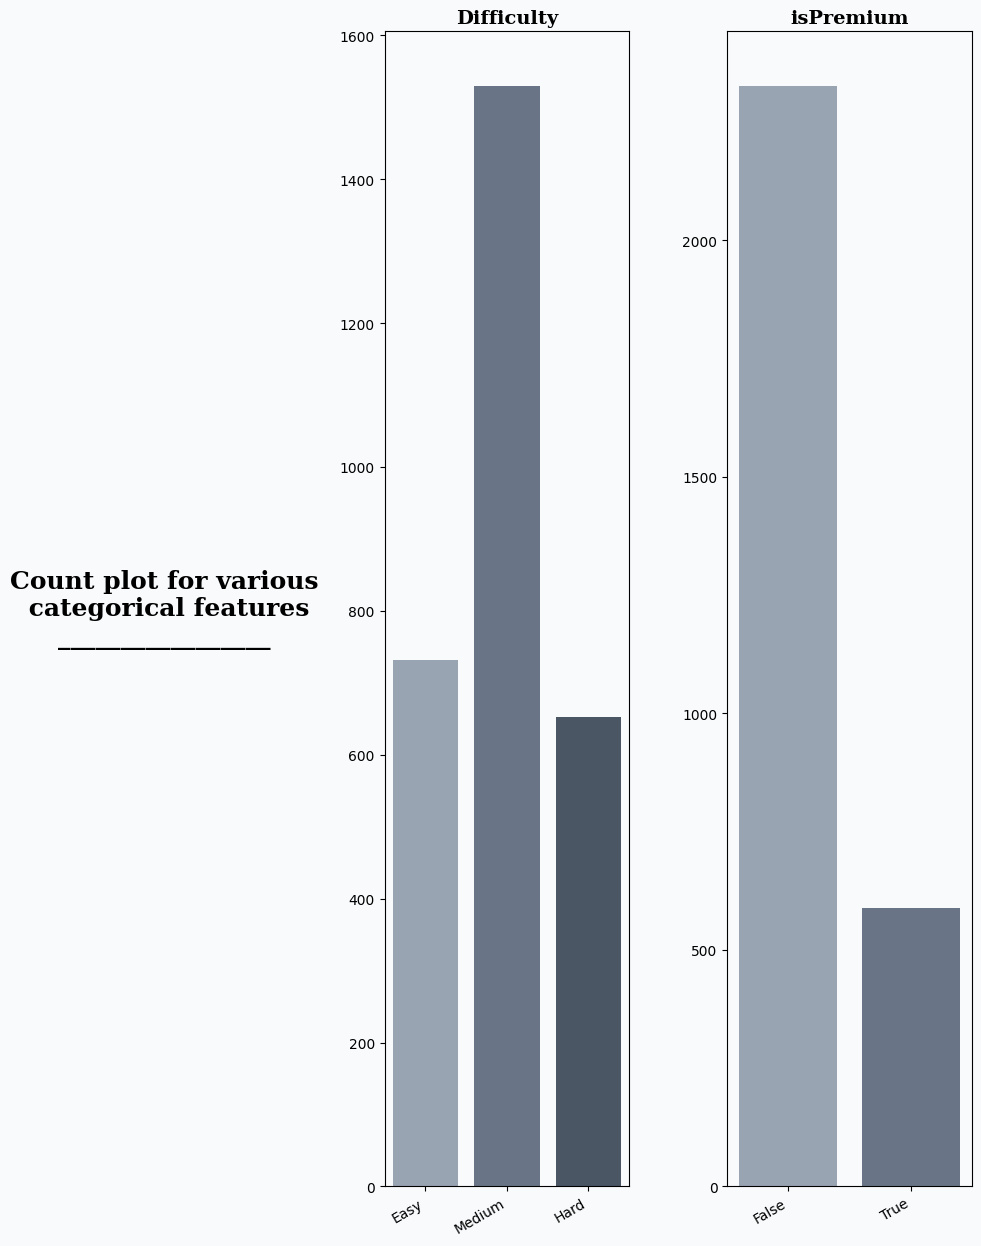

In [10]:
# Figure adjustments

# Larger size for better visualization
fig = plt.figure(figsize=(12, 15))  
gs = fig.add_gridspec(1, 3)
# Increases space between subplots
gs.update(wspace=0.4, hspace=0.7)  


background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i,j]) for i in range(1) for j in range(3)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot for each categorical feature
plot_features = ['Difficulty', 'isPremium']
titles = ["Difficulty", "isPremium"]

for i, feature in enumerate(plot_features):
    ax = axes[i + 1]
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Adjust and show
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

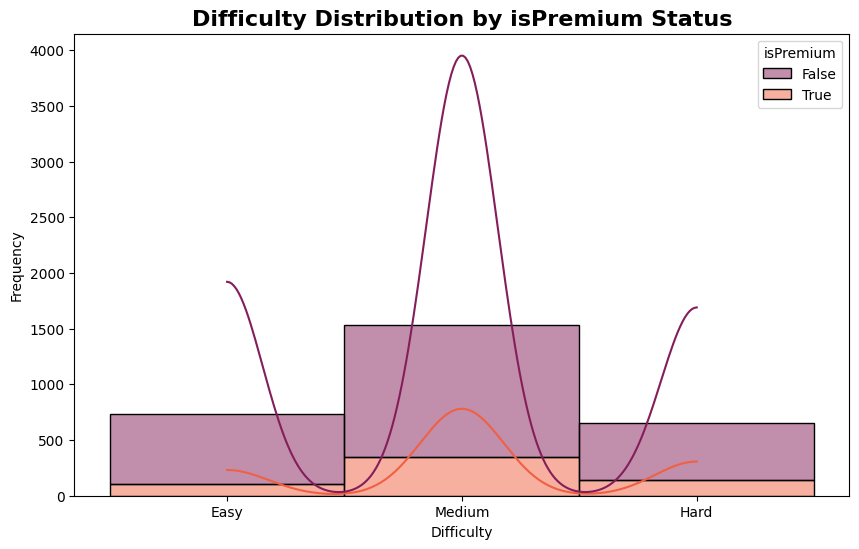

In [23]:
# Difficulty Distribution by isPremium Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Difficulty', hue='isPremium', multiple='stack', palette='rocket', kde=True)
plt.title('Difficulty Distribution by isPremium Status', fontsize=16, fontweight='bold')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Checking the uniqueness of 'Question_No'
unique_questions = data['Question_No'].nunique()
print(f"Total unique questions: {unique_questions}")

Total unique questions: 2913


In [28]:
# Displaying a few random questions to understand the data
sample_questions = data['Question'].sample(5).values
print("Sample questions:")
for question in sample_questions:
    print(f"- {question}")

Sample questions:
-  Shifting Letters
-  Design Linked List
-  Sum in a Matrix
-  Longest Duplicate Substring
-  Delete Duplicate Emails


In [30]:
# Checking if there are any missing or malformed links
valid_question_links = data['Question_Link'].apply(lambda x: x.startswith('https://')).sum()
valid_solution_links = data['Solution'].apply(lambda x: x.startswith('https://')).sum()

print(f"Valid question links: {valid_question_links} out of {len(data)}")
print(f"Valid solution links: {valid_solution_links} out of {len(data)}")

Valid question links: 2913 out of 2913
Valid solution links: 2913 out of 2913


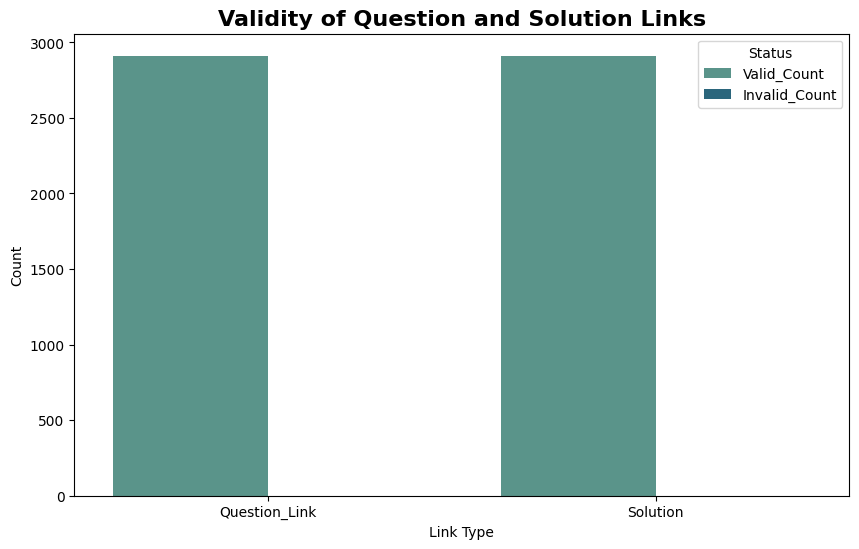

In [31]:
# Visualizing the proportion of valid links for 'Question_Link' and 'Solution'
link_data = pd.DataFrame({
    'Type': ['Question_Link', 'Solution'],
    'Valid_Count': [valid_question_links, valid_solution_links],
    'Invalid_Count': [len(data) - valid_question_links, len(data) - valid_solution_links]
})
plt.figure(figsize=(10, 6))
sns.barplot(data=link_data.melt(id_vars='Type', var_name='Status', value_name='Count'), x='Type', y='Count', hue='Status', palette='crest')
plt.title('Validity of Question and Solution Links', fontsize=16, fontweight='bold')
plt.xlabel('Link Type')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


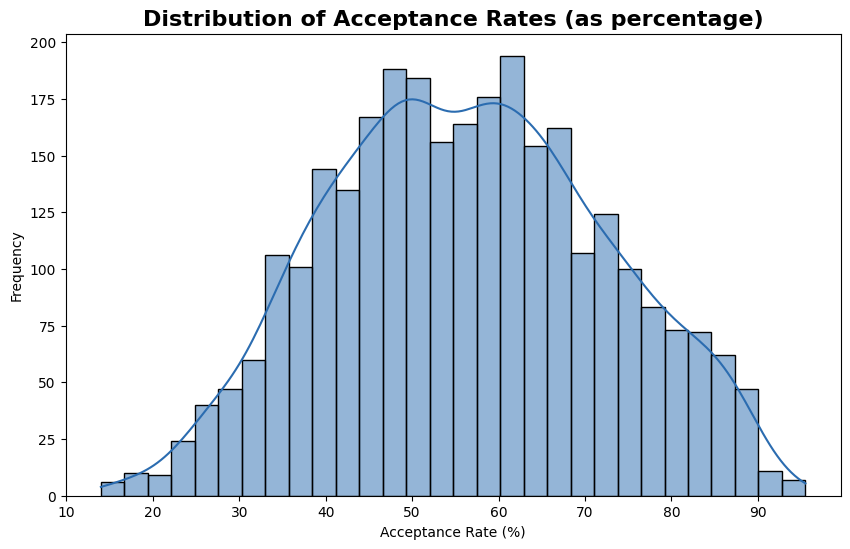

In [32]:
# Removing the '%' sign and converting to a float
data['Acceptance'] = data['Acceptance'].str.rstrip('%').astype('float')

plt.figure(figsize=(10, 6))
sns.histplot(data['Acceptance'], bins=30, kde=True, color='#2b6cb0')
plt.title('Distribution of Acceptance Rates (as percentage)', fontsize=16, fontweight='bold')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

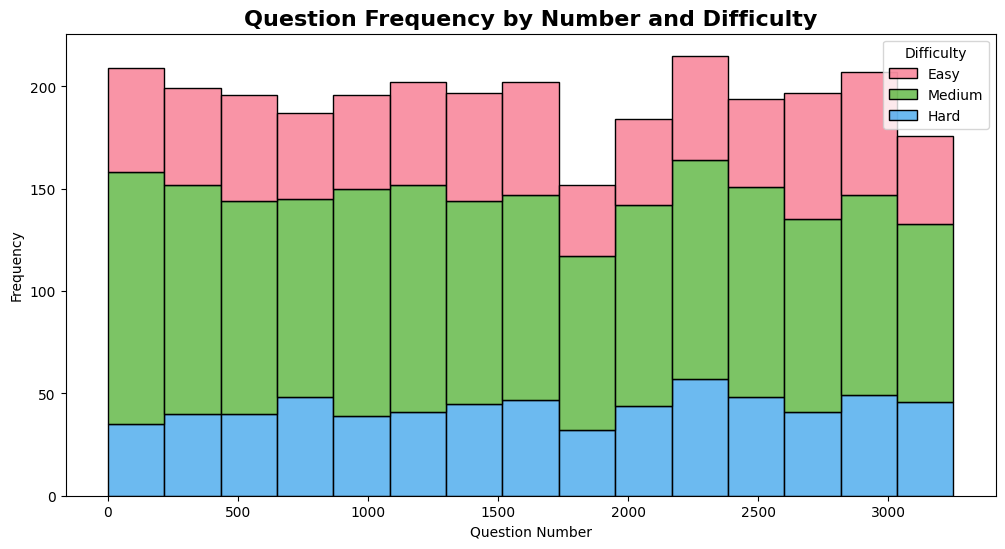

In [33]:
# Plotting the frequency of questions by difficulty with a focus on 'Question_No'
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Question_No', hue='Difficulty', palette='husl', multiple='stack')
plt.title('Question Frequency by Number and Difficulty', fontsize=16, fontweight='bold')
plt.xlabel('Question Number')
plt.ylabel('Frequency')
plt.show()

Accuracy: 0.48
Classification Report:
               precision    recall  f1-score   support

        Easy       0.45      0.37      0.40       149
        Hard       0.31      0.32      0.32       122
      Medium       0.54      0.59      0.56       312

    accuracy                           0.48       583
   macro avg       0.44      0.43      0.43       583
weighted avg       0.47      0.48      0.47       583



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


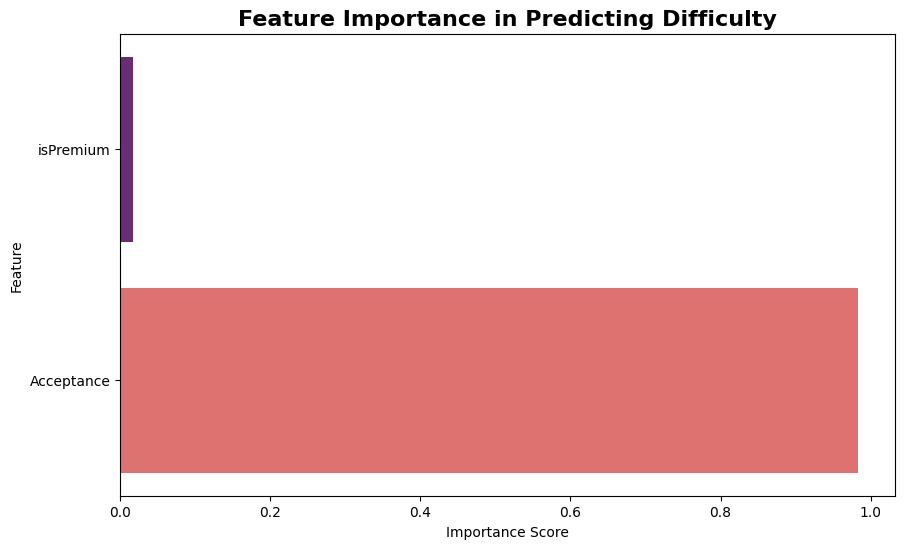

In [37]:
# Classification Model to Predict Difficulty

# Encode 'Difficulty' as numerical labels
label_encoder = LabelEncoder()
encoded_data['Difficulty_Label'] = label_encoder.fit_transform(data['Difficulty'])

# Features and target variable for classification
features_classification = ['isPremium', 'Acceptance']
X_classification = encoded_data[features_classification]
y_classification = encoded_data['Difficulty_Label']

# Splitting the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Training a classification model (Random Forest Classifier)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Predictions and evaluation for classification
y_pred_class = classifier.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
report = classification_report(y_test_class, y_pred_class, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Visualizing the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=classifier.feature_importances_, y=list(features_classification), palette='magma')
plt.title('Feature Importance in Predicting Difficulty', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

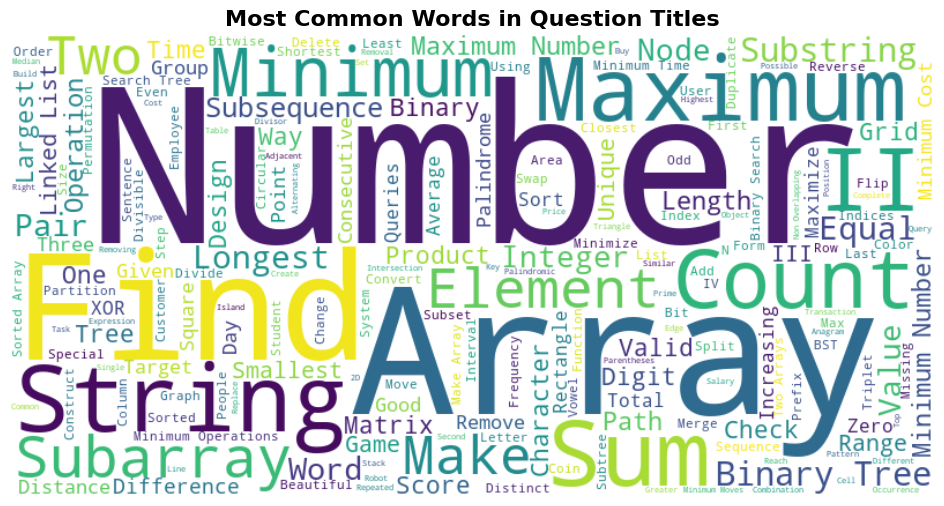

In [34]:
question_text = " ".join(data['Question'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(question_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Question Titles', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()